# Dataset generation from the Tallo and Neon datasets dataset

## Neon dataset:
Downloaded on 04/07/2023:
https://github.com/weecology/NeonSpeciesBenchmark/tree/main/data/raw/neon_vst_data_2022.csv

## Tallo database:
Downloaded on 04/07/2023:
https://zenodo.org/record/6637599
https://onlinelibrary.wiley.com/doi/full/10.1111/gcb.16302


In [27]:
import pandas as pd

neon_colour = '#AD67E4'
tallo_colour = '#B8E467'

data_dir = '../data/to_publish/'
fig_dir = f'{data_dir}figs/'
# Read in Tallo and Neon
tallo_df = pd.read_csv(f'{data_dir}raw/inaturalist_observations-406349.csv')
neon_df = pd.read_csv(f'{data_dir}raw/neon_vst_data_2022.csv')
print(len(tallo_df), len(neon_df))

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_3373/2997516649.py:9: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  tallo_df = pd.read_csv(f'{data_dir}raw/inaturalist_observations-406349.csv')


99527 100628


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_3373/2997516649.py:10: DtypeWarning: Columns (34,35,40,41,42,47) have mixed types. Specify dtype option on import or set low_memory=False.
  neon_df = pd.read_csv(f'{data_dir}raw/neon_vst_data_2022.csv')


In [49]:
ag_species = ['Gossypium', 'Triticum', 'Zea mays', 'sativa', 'Sorghum', 'Oryza', 'Avena sativa',
              'Vitis vinifera', 'Solanum lycopersicum', 'Nicotiana tabacum', 'Brassica napus']
#ag_species = ['Cotton', 'Wheat']

ag_sp = []
for c in tallo_df['taxon_species_name'].values:
    ag = False
    for a in ag_species:
        if isinstance(c, str):
            if a.lower() in c.lower():
                ag_sp.append(a)
                ag = True
                break
    if not ag:
        ag_sp.append('-')
tallo_df['ag'] = ag_sp

In [50]:
tallo_df['ag'].value_counts()

ag
-                       99458
sativa                     38
Sorghum                    18
Solanum lycopersicum        4
Zea mays                    3
Gossypium                   3
Triticum                    2
Vitis vinifera              1
Name: count, dtype: int64

In [42]:
ag_df = tallo_df[tallo_df['ag'].isin(['cotton'])]
ag_df.to_csv(f'{}')

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,taxon_id,taxon_kingdom_name,taxon_phylum_name,taxon_class_name,taxon_order_name,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,ag
55,37268907,2020/01/04 11:23 AM CST,2020-01-04,2020-01-04 17:23:00 UTC,Central Time (US & Canada),321478,mamestraconfigurata,Ian Toal,2020-01-04 17:05:54 UTC,2020-01-12 14:50:48 UTC,...,52119,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Salicaceae,Populus,Populus deltoides,NaN,cotton
1024,38362706,2020-02-06 9:06:34 AM EST,2020-02-06,2020-02-06 14:06:34 UTC,Eastern Time (US & Canada),469795,pdabell,Paul Abell,2020-02-06 17:29:02 UTC,2022-12-04 01:34:41 UTC,...,52119,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Salicaceae,Populus,Populus deltoides,NaN,cotton
1827,38727328,2020-02-16 3:02:51 PM EST,2020-02-16,2020-02-16 20:02:51 UTC,Eastern Time (US & Canada),1453413,wendelyns,Wendelyn Bolles,2020-02-16 22:02:15 UTC,2022-12-04 01:34:54 UTC,...,52119,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Salicaceae,Populus,Populus deltoides,NaN,cotton
1846,38739151,2020/02/16 11:21 AM PST,2020-02-16,2020-02-16 19:21:00 UTC,Pacific Time (US & Canada),388712,lagoondon,Don Rideout,2020-02-17 03:21:58 UTC,2022-03-07 17:15:41 UTC,...,77800,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Logfia,Logfia depressa,NaN,cotton
2075,39026996,Wed Feb 19 2020 11:48:45 GMT-0800 (PST),2020-02-19,2020-02-19 11:48:45 UTC,UTC,2467441,b0tanica,Stephen Wolf,2020-02-22 00:05:49 UTC,2020-05-22 06:54:40 UTC,...,79334,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Tetradymia,Tetradymia stenolepis,NaN,cotton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98536,194833979,2023-12-24 09:40:03,2023-12-24,2023-12-24 15:40:03 UTC,Central Time (US & Canada),168440,ammophila,Brian Charles,2023-12-25 19:41:02 UTC,2023-12-27 04:33:17 UTC,...,52119,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Salicaceae,Populus,Populus deltoides,NaN,cotton
98849,195338370,2022-09-08 11:46:37,2022-09-08,2022-09-08 18:46:37 UTC,Arizona,7698867,kmfox2az,Kevin Fox,2023-12-31 04:22:39 UTC,2024-01-02 00:39:58 UTC,...,52120,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Salicaceae,Populus,Populus fremontii,NaN,cotton
99208,196258383,2023-12-22 12:54:26,2023-12-22,2023-12-22 20:54:26 UTC,Pacific Time (US & Canada),4022490,average_plant_enjoyer,NaN,2024-01-10 06:22:11 UTC,2024-01-11 00:46:53 UTC,...,52120,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Salicaceae,Populus,Populus fremontii,NaN,cotton
99434,198027428,2023/07/14 8:29 AM,2023-07-14,2023-07-14 14:29:00 UTC,Mountain Time (US & Canada),3185948,jessie_stong,Jessie Stong,2024-01-31 03:47:05 UTC,2024-02-27 02:05:02 UTC,...,78259,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Onopordum,Onopordum acanthium,NaN,cotton


In [29]:
tallo_df['taxon_class_name'].value_counts()

taxon_class_name
Magnoliopsida        77460
Liliopsida            9255
Pinopsida             8740
Polypodiopsida        2532
Bryopsida              991
Jungermanniopsida      246
Lycopodiopsida         148
Polytrichopsida         49
Gnetopsida              38
Ulvophyceae             16
Ginkgoopsida            15
Marchantiopsida         12
Sphagnopsida            10
Cycadopsida              9
Tetraphidopsida          4
Florideophyceae          1
Anthocerotopsida         1
Name: count, dtype: int64

# Update Neon to use same species labels

## Convert species to standard names as those used in Tallo

Use the taxonstand paper as in the Tallo paper: https://cran.r-project.org/web/packages/Taxonstand/index.html

```
install.packages("Taxonstand")
library(Taxonstand)
species <- read.csv('../data/harvard/species_list.csv')
species_list <- unlist(species[[1]])
species_list[1]
renamed_species <- TPL(species_list)
write.csv(renamed_species, '../data/harvard/species_list_renamed.csv')
```

In [2]:
from remseno import *

u = SciUtil()
# Print species names
u.dp(['Tallo species'])
print(tallo_df['taxon_species_name'].value_counts())

# Neon uses a different species labelling so we need to update this
u.dp(['Neon species'])
print(neon_df['scientificName'].value_counts())

# use https://cran.r-project.org/web/packages/Taxonstand/Taxonstand.pdf to convert to the plants
species_list = list(set(neon_df['scientificName'].values))
with open(f'{data_dir}species_list.csv', 'w+') as fout:
    for s in species_list:
        fout.write(f'{s}\n')

2024-02-28 19:39:36.406979: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


--------------------------------------------------------------------------------
                                 Tallo species	                                 
--------------------------------------------------------------------------------
taxon_species_name
Yucca brevifolia              1932
Cylindropuntia echinocarpa    1452
Ailanthus altissima           1353
Yucca schidigera              1274
Cylindropuntia ramosissima    1251
                              ... 
Castilleja linariifolia          1
Eucalyptus viminalis             1
Veratrum woodii                  1
Gaylussacia frondosa             1
Corallorhiza odontorhiza         1
Name: count, Length: 4778, dtype: int64
--------------------------------------------------------------------------------
                                 Neon species	                                  
--------------------------------------------------------------------------------
scientificName
Acer rubrum L.                                      956

## Update the species based on the ones we got in R



In [3]:
# Read in the updated species list
species_df = pd.read_csv(f'{data_dir}species_list_renamed.csv', index_col=0)
# Join the two dataframes as in update the species lists in the NEON dataframe
genera = species_df['Genus'].values
species_df['species'] = [f'{genera[i]} {s.lower()}' for i, s in enumerate(species_df['Species'].values)]
species_df['species'].value_counts()
label_to_species = dict(zip(species_df.Taxon, species_df.species))
label_to_genus = dict(zip(species_df.Taxon, species_df.Genus))
label_to_family = dict(zip(species_df.Taxon, species_df.Family))
# Also need to do some data processing since the lat and long are annoying!
neon_df['longitude'] = [float(x.split("(")[1].split(",")[0]) for x in neon_df['geometry'].values]
neon_df['latitude'] = [float(x.split(" ")[1].split(")")[0])for x in neon_df['geometry'].values]
neon_df['species'] = [label_to_species.get(s) for s in neon_df['scientificName'].values]
neon_df['genera'] = [label_to_genus.get(s) for s in neon_df['scientificName'].values]
neon_df['family'] = [label_to_family.get(s) for s in neon_df['scientificName'].values]
neon_df

,Unnamed: 0,uid.x,individualID,eventID,tagStatus,growthForm,plantStatus,stemDiameter,measurementHeight,height,...,elevation,vertUncert,nlcdClass,appMods,geometry,itcEasting,itcNorthing,species,genera,family
0,1,59702b01-0649-4b0a-88a6-119a9c0f8d49,NEON.PLA.D01.BART.05273,vst_BART_2015,NaN,single bole tree,"Live, disease damaged",10.3,130.0,11.5,...,293.61,0.18,deciduousForest,bbc|cdw|cfc|dhp|hbp|vst,"c(-71.282966, 44.061595)",317149.133289,4.881250e+06,Fagus grandifolia,Fagus,Fagaceae
1,4,074ab6c5-ca6b-4b63-aa1d-8dd9ea434785,NEON.PLA.D01.BART.05415,vst_BART_2015,NaN,single bole tree,"Live, disease damaged",12.5,130.0,10.4,...,306.95,0.23,deciduousForest,bbc|cdw|cfc|dhp|hbp|ltr|vst,"c(-71.284075, 44.061045)",317053.946812,4.881177e+06,Fagus grandifolia,Fagus,Fagaceae
2,7,d6eeaa5d-b8f1-4776-8b8e-8e53b62e7c9b,NEON.PLA.D01.BART.05091,vst_BART_2015,NaN,single bole tree,"Live, disease damaged",25.8,130.0,16.3,...,303.74,0.20,deciduousForest,bbc|cdw|cfc|dhp|hbp|ltr|vst,"c(-71.284574, 44.06103)",317027.907817,4.881194e+06,Fagus grandifolia,Fagus,Fagaceae
3,8,ae20ee4d-8647-49bf-b32d-5c966bf10700,NEON.PLA.D01.BART.05405,vst_BART_2015,NaN,single bole tree,"Live, disease damaged",21.5,130.0,14.3,...,299.60,0.15,deciduousForest,bbc|cdw|cfc|dhp|hbp|ltr|vst,"c(-71.284581, 44.061221)",317035.949748,4.881202e+06,Fagus grandifolia,Fagus,Fagaceae
4,10,5a538e10-fac0-446f-a2f8-e7bbb3a798f0,NEON.PLA.D01.BART.05289,vst_BART_2015,NaN,single bole tree,Live,36.4,130.0,18.5,...,303.74,0.20,deciduousForest,bbc|cdw|cfc|dhp|hbp|ltr|vst,"c(-71.284574, 44.06103)",317026.280295,4.881190e+06,Acer rubrum,Acer,Sapindaceae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100623,367001,975891e4-2477-48d8-8ff8-7064cf22e426,NEON.PLA.D20.PUUM.03291,vst_PUUM_2020,ok,single bole tree,"Dead, broken bole",27.3,190.0,9.8,...,1126.13,0.22,evergreenForest,cdw|cfc|dhp|hbp|vst,"c(-155.233375, 19.555083)",265675.870835,2.163772e+06,nan plant,NaN,NaN
100624,367002,9bb81c10-c504-40d4-ad5a-71f2dd30920c,NEON.PLA.D20.PUUM.03339,vst_PUUM_2020,ok,single bole tree,Live,19.5,180.0,17.8,...,1126.13,0.22,evergreenForest,cdw|cfc|dhp|hbp|vst,"c(-155.233375, 19.555083)",265681.075200,2.163775e+06,Metrosideros polymorpha,Metrosideros,Myrtaceae
100625,367003,33895dcf-85c5-469e-928c-cc50e38ddb13,NEON.PLA.D20.PUUM.03289,vst_PUUM_2020,ok,single bole tree,Standing dead,21.8,130.0,10.8,...,1128.00,0.28,evergreenForest,cdw|cfc|dhp|hbp|vst,"c(-155.233462, 19.554987)",265684.577390,2.163763e+06,Metrosideros polymorpha,Metrosideros,Myrtaceae
100626,367005,159ba210-d5ba-4278-abfd-182019c519e8,NEON.PLA.D20.PUUM.03330,vst_PUUM_2020,ok,single bole tree,Live,29.1,210.0,20.1,...,1128.00,0.28,evergreenForest,cdw|cfc|dhp|hbp|vst,"c(-155.233462, 19.554987)",265677.401007,2.163771e+06,Metrosideros polymorpha,Metrosideros,Myrtaceae


In [4]:
tallo_df

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,iconic_taxon_name,taxon_id,taxon_kingdom_name,taxon_phylum_name,taxon_class_name,taxon_order_name,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name
0,37160480,2020-01-01 11:01:02 AM EST,2020-01-01,2020-01-01 16:01:02 UTC,Eastern Time (US & Canada),2169795,norwichtim,Timothy Grover,2020-01-01 16:03:17 UTC,2023-03-09 14:48:12 UTC,...,Plantae,52391,Plantae,Tracheophyta,Pinopsida,Pinales,Pinaceae,Pinus,Pinus strobus,NaN
1,37161897,Wed Jan 01 2020 11:57:24 GMT-0500 (EST),2020-01-01,2020-01-01 16:57:24 UTC,Eastern Time (US & Canada),1888229,housa03,NaN,2020-01-01 17:00:08 UTC,2022-03-13 12:40:27 UTC,...,Plantae,54779,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus alba,NaN
2,37165925,2020-01-01 12:50:58 PM EST,2020-01-01,2020-01-01 17:50:58 UTC,Eastern Time (US & Canada),765315,matushkaelizabethperdomo,Matushka Elizabeth Perdomo,2020-01-01 19:20:48 UTC,2020-01-02 14:14:10 UTC,...,Plantae,169048,Plantae,Tracheophyta,Liliopsida,Liliales,Smilacaceae,Smilax,Smilax smallii,NaN
3,37171371,Wed Jan 01 2020 10:56:29 GMT-0800 (PST),2020-01-01,2020-01-01 18:56:29 UTC,Pacific Time (US & Canada),19715,gbentall,Gena Bentall,2020-01-01 21:56:29 UTC,2020-03-11 00:00:35 UTC,...,Plantae,69823,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Notholithocarpus,Notholithocarpus densiflorus,NaN
4,37172020,Wed Jan 01 2020 15:56:14 GMT-0600 (CST),2020-01-01,2020-01-01 15:56:14 UTC,UTC,957274,jkilfeather,NaN,2020-01-01 22:18:23 UTC,2020-12-15 00:00:03 UTC,...,Plantae,77740,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Oleaceae,Ligustrum,Ligustrum lucidum,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99522,200470601,2023-04-22 08:49:49-07:00,2023-04-22,2023-04-22 15:49:49 UTC,Pacific Time (US & Canada),1195388,coreyhusic,Corey Husic,2024-02-26 01:54:54 UTC,2024-02-27 23:16:39 UTC,...,Plantae,58309,Plantae,Tracheophyta,Magnoliopsida,Rosales,Rosaceae,Prunus,Prunus fasciculata,NaN
99523,200477134,2022/04/30 10:23 AM,2022-04-30,2022-04-30 14:23:00 UTC,Eastern Time (US & Canada),7703963,ijamesmac71,NaN,2024-02-26 03:04:11 UTC,2024-02-28 01:53:20 UTC,...,Plantae,52391,Plantae,Tracheophyta,Pinopsida,Pinales,Pinaceae,Pinus,Pinus strobus,NaN
99524,200600833,2023-02-26 16:26:38-08:00,2023-02-26,2023-02-27 00:26:38 UTC,Pacific Time (US & Canada),6097240,devino_bambino,NaN,2024-02-27 09:11:31 UTC,2024-02-27 20:17:54 UTC,...,Plantae,50171,Plantae,Tracheophyta,Magnoliopsida,Boraginales,Boraginaceae,Phacelia,Phacelia campanularia,NaN
99525,200651794,2023-02-26 15:53:47-08:00,2023-02-26,2023-02-26 23:53:47 UTC,Pacific Time (US & Canada),6097240,devino_bambino,NaN,2024-02-27 20:36:31 UTC,2024-02-27 21:07:50 UTC,...,Plantae,50184,Plantae,Tracheophyta,Liliopsida,Arecales,Arecaceae,Washingtonia,Washingtonia filifera,NaN


## Plot both datasets around the world

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_3373/2890893391.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


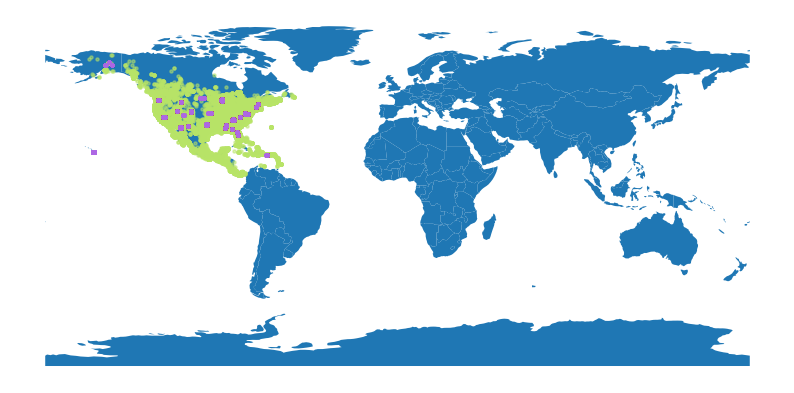

In [5]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(tallo_df['longitude'], tallo_df['latitude'])]
gdf = GeoDataFrame(tallo_df, geometry=geometry)  

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color=tallo_colour, markersize=5, alpha=0.5)

geometry = [Point(xy) for xy in zip(neon_df['longitude'], neon_df['latitude'])]
gdf = GeoDataFrame(neon_df, geometry=geometry)   

gdf.plot(ax=ax, marker='o', color=neon_colour, markersize=5, alpha=0.5)
plt.axis('off')
plt.savefig(f'{fig_dir}Figure1_all_data_map.svg')

## Filter for shared species since that's all we'll be able to look at anyway


In [6]:
tallo_df['species'] = tallo_df['taxon_species_name'].values
tallo_df['family'] = tallo_df['taxon_family_name'].values
tallo_df['genus'] = tallo_df['taxon_genus_name'].values

--------------------------------------------------------------------------------
                          Tallo shared species,	26463	                          
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                          NEON shared species,	84893	                           
--------------------------------------------------------------------------------


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_3373/2195974927.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


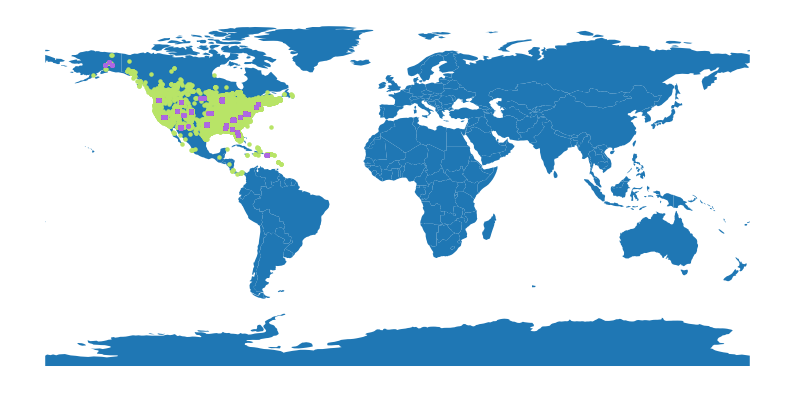

In [7]:
# Filter to only include species in NEON
shared_species = set(list(species_df['species'].values)) & set(list(tallo_df['species'].values))

tallo_df = tallo_df[tallo_df['species'].isin(shared_species)]
u.dp(['Tallo shared species,', len(tallo_df)])

neon_df = neon_df[neon_df['species'].isin(shared_species)]
u.dp(['NEON shared species,', len(neon_df)])

geometry = [Point(xy) for xy in zip(tallo_df['longitude'], tallo_df['latitude'])]
gdf = GeoDataFrame(tallo_df, geometry=geometry)  

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color=tallo_colour, markersize=5)

geometry = [Point(xy) for xy in zip(neon_df['longitude'], neon_df['latitude'])]
gdf = GeoDataFrame(neon_df, geometry=geometry)   

gdf.plot(ax=ax, marker='o', color=neon_colour, markersize=5)
plt.axis('off')
plt.savefig(f'{fig_dir}Figure1_shared_species_map.svg')

In [8]:
!  pip install ../../sciviso/dist/sciviso-1.0.9.tar.gz 

Processing /Users/ariane/Documents/code/sciviso/dist/sciviso-1.0.9.tar.gz
  Preparing metadata (setup.py) ... done
  Created wheel for sciviso: filename=sciviso-1.0.9-py3-none-any.whl size=57910 sha256=27fee459261a4ec8c316bbab8d50cc0afe85212982260635c8b995acab39a9bf
  Stored in directory: /Users/ariane/Library/Caches/pip/wheels/d7/53/35/70ea32487006e784152f19376ca855ec12324cbba0fa775230
Successfully built sciviso
  Attempting uninstall: sciviso
    Found existing installation: sciviso 1.0.9
    Uninstalling sciviso-1.0.9:
      Successfully uninstalled sciviso-1.0.9


In [9]:
###############################################################################
#                                                                             #
#    This program is free software: you can redistribute it and/or modify     #
#    it under the terms of the GNU General Public License as published by     #
#    the Free Software Foundation, either version 3 of the License, or        #
#    (at your option) any later version.                                      #
#                                                                             #
#    This program is distributed in the hope that it will be useful,          #
#    but WITHOUT ANY WARRANTY; without even the implied warranty of           #
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the            #
#    GNU General Public License for more details.                             #
#                                                                             #
#    You should have received a copy of the GNU General Public License        #
#    along with this program. If not, see <http://www.gnu.org/licenses/>.     #
#                                                                             #
###############################################################################

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm

from sciviso import Vis


class Countplot(Vis):

    def __init__(self, df: pd.DataFrame, x=None, y=None, title='', xlabel='', ylabel='', colour=None, hue=None,
                 min_x=None, max_x=None, min_y=None, max_y=None,
                 figsize=(3, 3), config={}):
        super().__init__(df, figsize=figsize)
        self.df = df
        self.x = x
        self.y = y
        self.title = title
        self.hue = hue
        self.colour = colour if colour is not None else "black"
        self.label = 'countplot'
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.min_x = min_x
        self.min_y = min_y
        self.max_y = max_y
        self.max_x = max_x
        if config:
            self.load_style(config)

    def plot(self):
        x = self.x
        y = self.y
        # First lets check whether we were passed lists or strings for our y and x arrays
        if x is not None:
            ax = sns.countplot(data=self.df, x=x, hue=self.hue, palette=self.palette, order =self.df[x].value_counts().index)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', weight='bold')
        elif y is not None:
            ax = sns.countplot(data=self.df, y=y, hue=self.hue, palette=self.palette)
        self.add_labels()
        self.apply_limits('x', self.max_x, self.min_x)
        self.apply_limits('y', self.max_y, self.min_y)

        self.set_ax_params(ax)
        plt.tight_layout()
        return ax

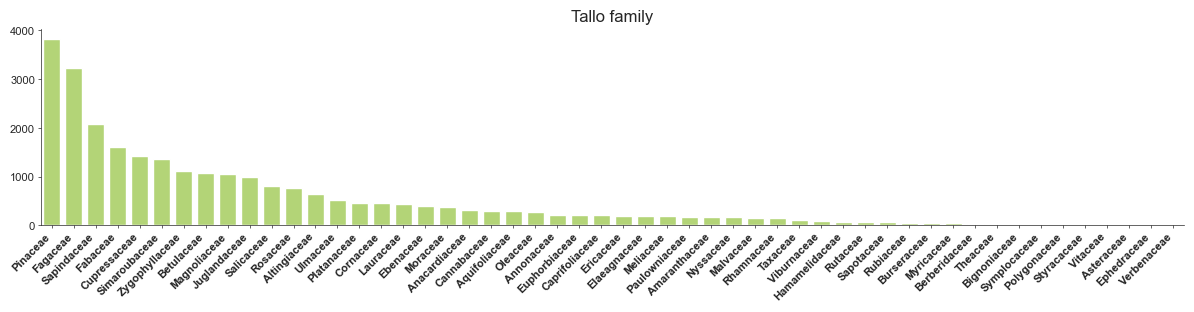

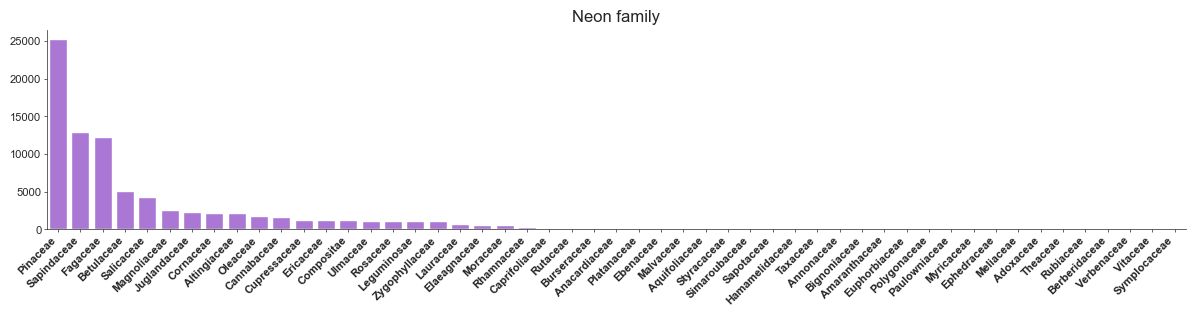

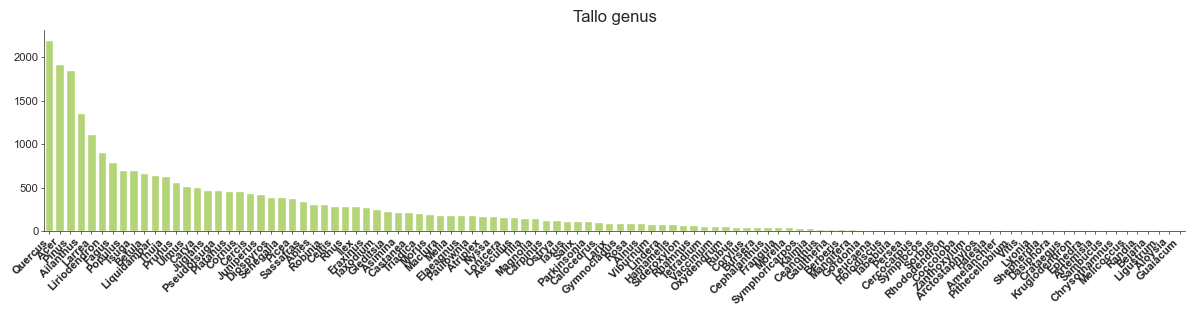

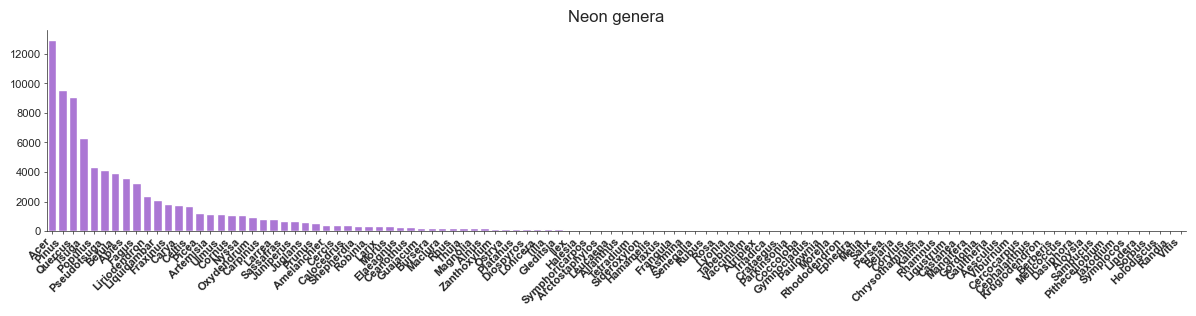

In [10]:
# Make plots from both datasets about the number of species etc
#from sciviso import *

neon_config = {'palette': [neon_colour]}
tallo_config = {'palette': [tallo_colour]}

c = Countplot(tallo_df, x='family', figsize=(12, 3), config=tallo_config)
c.plot()
plt.title('Tallo family')
plt.savefig(f'{fig_dir}Figure1_tallo_family_shared_species.svg')
plt.show()

c = Countplot(neon_df, x='family', figsize=(12, 3), config=neon_config)
c.plot()
plt.title('Neon family')
plt.savefig(f'{fig_dir}Figure1_neon_family_shared_species.svg')
plt.show()

c = Countplot(tallo_df, x='genus', figsize=(12, 3), config=tallo_config)
c.plot()
plt.title('Tallo genus')
plt.savefig(f'{fig_dir}Figure1_tallo_genus_shared_species.svg')
plt.show()

c = Countplot(neon_df, x='genera', figsize=(12, 3), config=neon_config)
c.plot()
plt.title('Neon genera')
plt.savefig(f'{fig_dir}Figure1_neon_genus_shared_species.svg')
plt.show()

# Get shared species with > 1 in each dataset 

--------------------------------------------------------------------------------
                          Tallo shared species,	14981	                          
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                          NEON shared species,	57887	                           
--------------------------------------------------------------------------------


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_3373/1485554657.py:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


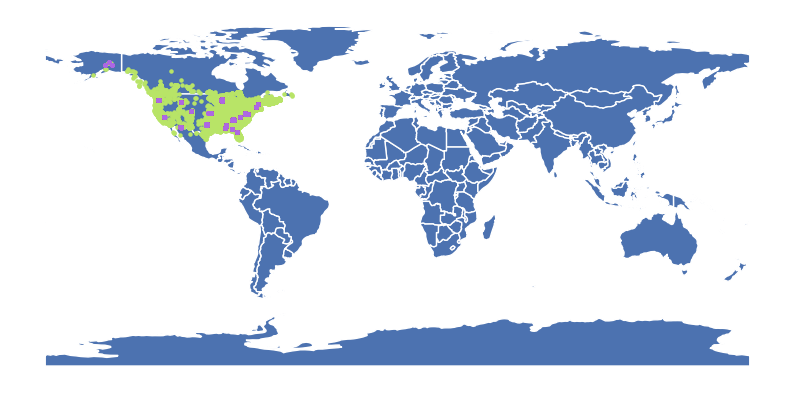

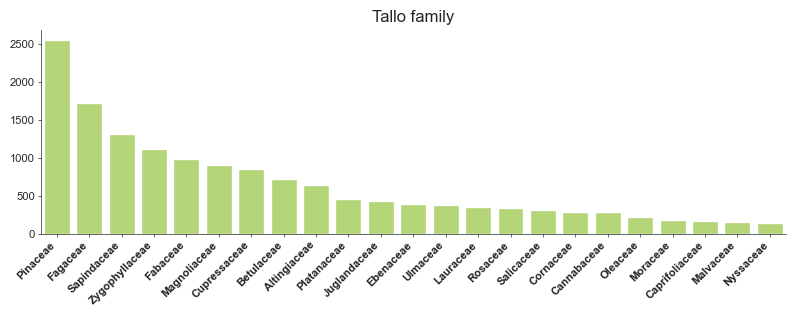

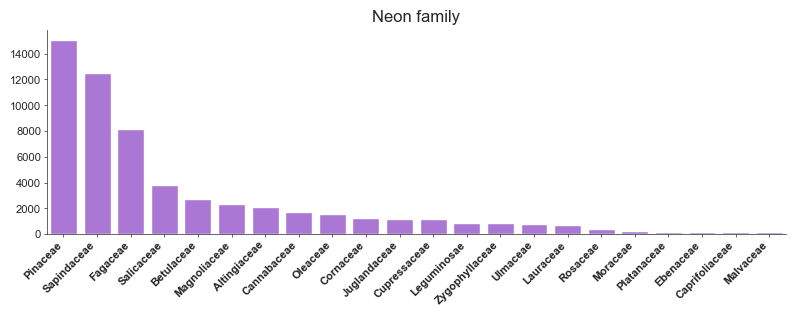

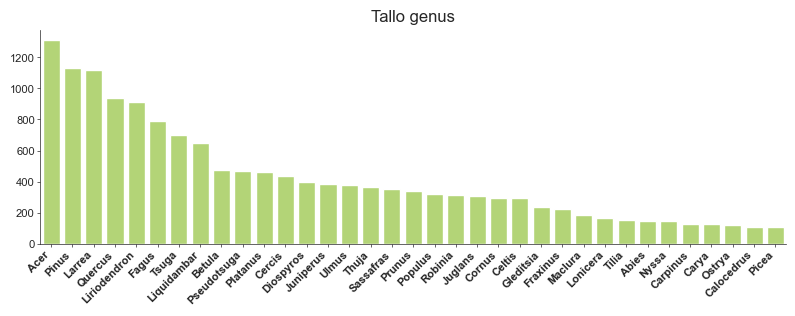

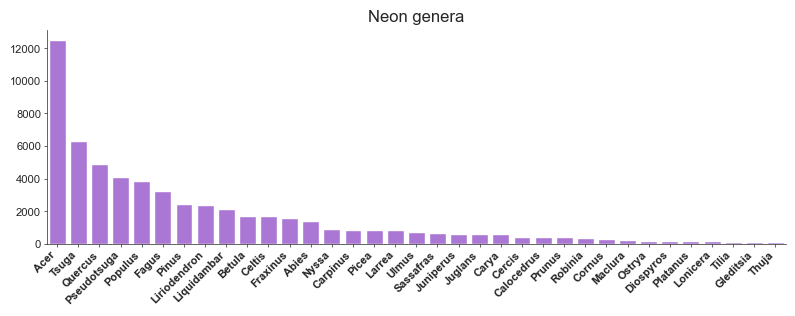

In [11]:
shared_extra_species = []
count = 100
for species in shared_species:
    if len(tallo_df[tallo_df['species'] == species]) > count and len(neon_df[neon_df['species'] == species]) > count:
        shared_extra_species.append(species)
        
# Filter to only include species in NEON
tallo_df = tallo_df[tallo_df['species'].isin(shared_extra_species)]
u.dp(['Tallo shared species,', len(tallo_df)])

neon_df = neon_df[neon_df['species'].isin(shared_extra_species)]
u.dp(['NEON shared species,', len(neon_df)])

geometry = [Point(xy) for xy in zip(tallo_df['longitude'], tallo_df['latitude'])]
gdf = GeoDataFrame(tallo_df, geometry=geometry)  

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color=tallo_colour, markersize=5)

geometry = [Point(xy) for xy in zip(neon_df['longitude'], neon_df['latitude'])]
gdf = GeoDataFrame(neon_df, geometry=geometry)   

gdf.plot(ax=ax, marker='o', color=neon_colour, markersize=5)
plt.axis('off')
plt.savefig(f'{fig_dir}Figure1_shared_many_species_map.svg')
plt.show()

c = Countplot(tallo_df, x='family', figsize=(8, 3), config=tallo_config)
c.plot()
plt.title('Tallo family')
plt.savefig(f'{fig_dir}Figure1_tallo_family_shared_many_species.svg')
plt.show()

c = Countplot(neon_df, x='family', figsize=(8, 3), config=neon_config)
c.plot()
plt.title('Neon family')
plt.savefig(f'{fig_dir}Figure1_neon_family_shared_many_species.svg')
plt.show()

c = Countplot(tallo_df, x='genus', figsize=(8, 3), config=tallo_config)
c.plot()
plt.title('Tallo genus')
plt.savefig(f'{fig_dir}Figure1_tallo_genus_shared_many_species.svg')
plt.show()

c = Countplot(neon_df, x='genera', figsize=(8, 3), config=neon_config)
c.plot()
plt.title('Neon genera')
plt.savefig(f'{fig_dir}Figure1_neon_genus_shared_many_species.svg')
plt.show()

## For both Tallo and Neon group by location and identify image IDs from planet scope

As we're interested in identifying shared locations/unique locations group each by the location i.e. lat and long.

We need to do this for both Tallo and NEON.


# Do the same for Tallo, namely group the regions based on lat and lon

Then identify a bounding box for running the planetscope selection

In [12]:
grped = tallo_df.groupby(['latitude', 'longitude'])
location_map = {}

for location, values in grped:
    location_map[location] = {}
    family = {}
    genus = {}
    species = {}
    division = {}
    loc_size = len(values)
    for f in set(values['family'].values):
        family[f] = len(values['family']==f)/loc_size
    for f in set(values['genus'].values):
        genus[f] = len(values['genus']==f)/loc_size
    for f in set(values['species'].values):
        species[f] = len(values['species']==f)/loc_size
    location_map[location]['size'] = loc_size
    location_map[location]['family'] = family
    location_map[location]['genus'] = genus
    location_map[location]['species'] = species

In [13]:
# Calculate the number of places which have different numbers...
homo = []
hetro = []

for loc, location in location_map.items():
    if len(location['species']) == 1:
        homo += [c for c in location['species']] # i.e. add in the species
    else:
        hetro.append(loc)
u.dp(['Tallo species variety,', 'single:', len(homo), 'multiple:', len(hetro)])

tallo_df = tallo_df[tallo_df['species'].isin(homo)]
u.dp(['Tallo homo species,', len(tallo_df)])

tallo_df = tallo_df.groupby(['latitude', 'longitude']).agg({'id': 'first', 
                                                         'family': 'first',
                                                         'genus': 'first', 
                                                         'species': 'first'})

u.dp(['Tallo grouped by location:', len(tallo_df)])


--------------------------------------------------------------------------------
              Tallo species variety,	single:	14197	multiple:	218	               
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                           Tallo homo species,	14981	                           
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                       Tallo grouped by location:	14415	                        
--------------------------------------------------------------------------------


In [14]:
data_dir

'../data/to_publish/'

In [15]:
print(tallo_df.family.value_counts())
print(tallo_df.genus.value_counts())
print(tallo_df.species.value_counts())
tallo_df.to_csv(f'{data_dir}inaturalist_grouped_locations.csv')

family
Pinaceae          2458
Fagaceae          1661
Sapindaceae       1270
Zygophyllaceae    1095
Fabaceae           921
Magnoliaceae       883
Cupressaceae       841
Betulaceae         696
Altingiaceae       621
Platanaceae        443
Juglandaceae       413
Ulmaceae           364
Ebenaceae          346
Lauraceae          342
Rosaceae           330
Salicaceae         316
Cornaceae          288
Cannabaceae        282
Oleaceae           213
Moraceae           183
Caprifoliaceae     164
Malvaceae          150
Nyssaceae          135
Name: count, dtype: int64
genus
Acer            1270
Larrea          1095
Pinus           1093
Liriodendron     883
Quercus          880
Fagus            781
Tsuga            683
Liquidambar      621
Betula           463
Platanus         443
Pseudotsuga      437
Cercis           393
Juniperus        376
Ulmus            364
Thuja            359
Diospyros        346
Sassafras        342
Prunus           330
Populus          316
Robinia          300
Juglans     

# Data download section 

1. Create a bounding box and identify images from planetscope that fall within this area
2. Download the "best" one

In [20]:
import pandas as pd

c = Coords(f'{data_dir}inaturalist_grouped_locations.csv', x_col='longitude', y_col='latitude', label_col='family',
                   id_col='id', sep=',', class1='Angiosperm', class2='Gymnosperm', crs='EPSG:4326')
df = c.df
ys = df['latitude'].values
bbs = []
meters = 30
for i, x in enumerate(df['longitude'].values):
    bbs.append(c.build_polygon_from_centre_point(x, ys[i], meters, meters, crs='EPSG:4326'))
polygons = []
x0, x1, y0, y1 = [], [], [], []
for bs in bbs:
    cs = []
    for b in bs:
        cs.append([b[0], b[1]])
    polygons.append(cs)
    x0.append(min([x[1] for x in cs]))
    x1.append(max([x[1] for x in cs]))
    y0.append(min([x[0] for x in cs]))
    y1.append(max([x[0] for x in cs]))
df['x0'] = x0
df['x1'] = x1
df['y0'] = y0
df['y1'] = y1

image_ids = []
tree_ids = df['id'].values
# We want to get from summer 2022 
labels = [summer_2021, spring_2021, winter_2021, autumn_2021, 
          summer_2022, spring_2022, winter_2022, autumn_2022, 
          summer_2023, spring_2023, winter_2023, autumn_2023 
         ]
max_count = 3
for xi, x in enumerate(labels):
    for i in tqdm(range(0, len(polygons))):
        image_ids.append(select_image_ids(f'{data_dir}tree_files/{labels[xi]}_{tree_ids[i]}.csv', polygons[i], x,
                                      max_cloud_cover=0.1, visible_percent=95))


--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.	Angiosperm	Gymnosperm	 in column:	family	Your dataset origionally had:	14415	
Now you have:	14415	
--------------------------------------------------------------------------------


  0%|                                                                   | 4/14415 [00:03<3:24:25,  1.17it/s]

ortho_analytic_8b_sr


In [19]:
max_count

16

In [23]:
inat_df = tallo_df.head(max_count + 2)

In [24]:
inat_df['image_ids'] = image_ids
inat_df.to_csv(f'{data_dir}inat_grouped_locations_image_ids.csv')

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_3373/1002602536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inat_df['image_ids'] = image_ids


In [25]:
inat_df

,,id,family,genus,species,image_ids
latitude,longitude,,,,,
25.656207,-80.766374,97662203,Sapindaceae,Acer,Acer rubrum,20230220_150652_73_24c5
25.967317,-80.154964,73615055,Sapindaceae,Acer,Acer rubrum,20230111_150022_18_2432
26.067525,-80.276108,102089785,Sapindaceae,Acer,Acer rubrum,20230214_153622_13_247c
26.069281,-80.274400,87221629,Cannabaceae,Celtis,Celtis laevigata,20230214_153622_13_247c
26.106340,-81.713948,113255143,Sapindaceae,Acer,Acer rubrum,20230215_150454_51_241e


## For NEON it is slightly different as we need the bounds so that all points are considered

Here what we do is we get the bounding box of the lat and longditude for the different plots


In [29]:
# Group by image_id and see how many of them get plotted on the same image...
filename = f'{data_dir}NEON_grouped_locations.csv'
df = pd.read_csv(filename)

c = Coords(filename, x_col='longitude', y_col='latitude', label_col='family',
           id_col='uid.x', sep=',', class1='Angiosperm', class2='Gymnosperm', crs='EPSG:4326')

lat = df['latitude'].values
lon = df['longitude'].values
tree_ids = df['uid.x'].values

data = []
summer = ['2022-06-01T00:00:00.000Z',
          '2022-08-30T00:00:00.000Z',
          '2022-12-01T00:00:00.000Z',
          '2023-02-26T00:00:00.000Z']
image_ids_neon = []
plot_df = neon_df.groupby(['plotID'])
for plot_id, sub_df in plot_df:
    # Make a df on the coordinates and see how many fall on the 500m2 that I downloaded... might need to make more
    # or we could use for validation.
    # Get xmin, xmax, ymin and ymax of the region and padd by 100m
    lon_min = np.min(sub_df['longitude'].values)
    lon_max = np.max(sub_df['longitude'].values)
    lat_min = np.min(sub_df['latitude'].values)
    lat_max = np.max(sub_df['latitude'].values)
    aoi = [[lon_min, lat_min],
            [lon_max, lat_min],
            [lon_max, lat_max],
            [lon_min, lat_max],
            [lon_min, lat_min]]
    try:
    # Get the proper image ID...
        image_id_new = select_image_ids(f'{data_dir}tree_files/{plot_id}.csv', aoi, summer,
                         max_cloud_cover=0.1, visible_percent=95)
        image_ids_neon.append(image_id_new)
        data.append([aoi, image_id_new, plot_id])
    except:
        print(plot_id)

# If you want to actually download these, you need to run this below but from a 
# python script as asyncio doesn't work from Jupyter notebook!!
#asyncio.run(download(data))

--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.	Angiosperm	Gymnosperm	 in column:	family	Your dataset origionally had:	1032	
Now you have:	1032	
--------------------------------------------------------------------------------
('ABBY_008',)
('ABBY_018',)
('BART_006',)
('BLAN_009',)
('BLAN_015',)
('BONA_001',)
('BONA_013',)
('BONA_021',)
('BONA_074',)
('BONA_081',)
('BONA_083',)
('CLBJ_001',)
('CLBJ_018',)
('CLBJ_019',)
('CLBJ_025',)
('CLBJ_030',)
('CLBJ_036',)
('CLBJ_039',)
('CLBJ_041',)
('CLBJ_044',)
('DEJU_003',)
('DEJU_005',)
('DEJU_006',)
('DEJU_014',)
('DEJU_021',)
('DEJU_046',)
('DEJU_050',)
('DEJU_056',)
('DEJU_059',)
('DEJU_061',)
('DELA_001',)
('DSNY_002',)
('DSNY_003',)
('DSNY_010',)
('DSNY_012',)
('DSNY_014',)
('DSNY_015',)
('DSNY_016',)
('DSNY_018',)
('DSNY_019',)
('DSNY_020',)
('GRSM_001',)
('GRSM_002',)
('GRSM_003',)
('GRSM_004',)
('GRSM_005',)
('GRSM_006',)
('GRSM_007',)
('GRSM_008',)
('GRSM_010',)

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analyti

In [63]:
plot_to_image = {}
for d in data:
    plot_to_image[d[2][0]] = d[1]
neon_df['image_ids'] = [plot_to_image.get(p) for p in neon_df['plotID'].values]

In [64]:
neon_df.to_csv(f'{data_dir}Neon_grouped_locations_image_ids.csv', index=False)